In [1]:
import pandas as pd

file_path = "student-mat.csv" 
student_data = pd.read_csv(file_path, sep=';') 


print(student_data.head())



  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]


In [2]:
print(student_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [3]:
print(student_data.dtypes)



school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object


In [4]:
non_numeric_columns = student_data.select_dtypes(include=['object']).columns
print("Non-numeric columns:", non_numeric_columns)

Non-numeric columns: Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic'],
      dtype='object')


In [5]:
numeric_data = student_data.select_dtypes(include=['number'])
print("numeric data:", numeric_data)

numeric data:      age  Medu  Fedu  traveltime  studytime  failures  famrel  freetime  \
0     18     4     4           2          2         0       4         3   
1     17     1     1           1          2         0       5         3   
2     15     1     1           1          2         3       4         3   
3     15     4     2           1          3         0       3         2   
4     16     3     3           1          2         0       4         3   
..   ...   ...   ...         ...        ...       ...     ...       ...   
390   20     2     2           1          2         2       5         5   
391   17     3     1           2          1         0       2         4   
392   21     1     1           1          1         3       5         5   
393   18     3     2           3          1         0       4         4   
394   19     1     1           1          1         0       3         2   

     goout  Dalc  Walc  health  absences  G1  G2  G3  
0        4     1     1       3

In [6]:
student_data_encoded = pd.get_dummies(student_data, drop_first=True)
print("student data encoded:", student_data_encoded)


student data encoded:      age  Medu  Fedu  traveltime  studytime  failures  famrel  freetime  \
0     18     4     4           2          2         0       4         3   
1     17     1     1           1          2         0       5         3   
2     15     1     1           1          2         3       4         3   
3     15     4     2           1          3         0       3         2   
4     16     3     3           1          2         0       4         3   
..   ...   ...   ...         ...        ...       ...     ...       ...   
390   20     2     2           1          2         2       5         5   
391   17     3     1           2          1         0       2         4   
392   21     1     1           1          1         3       5         5   
393   18     3     2           3          1         0       4         4   
394   19     1     1           1          1         0       3         2   

     goout  Dalc  ...  guardian_mother  guardian_other  schoolsup_yes  \
0   

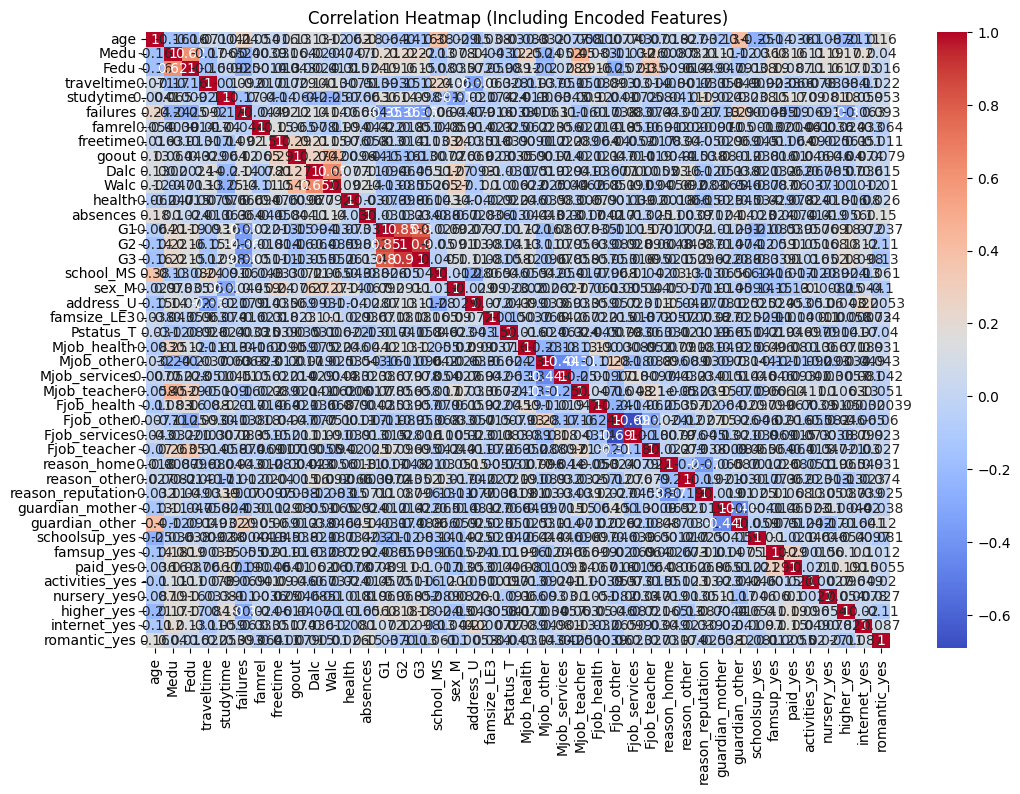

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

student_data_encoded = pd.get_dummies(student_data, drop_first=True)


plt.figure(figsize=(12, 8))
sns.heatmap(student_data_encoded.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap (Including Encoded Features)")
plt.show()


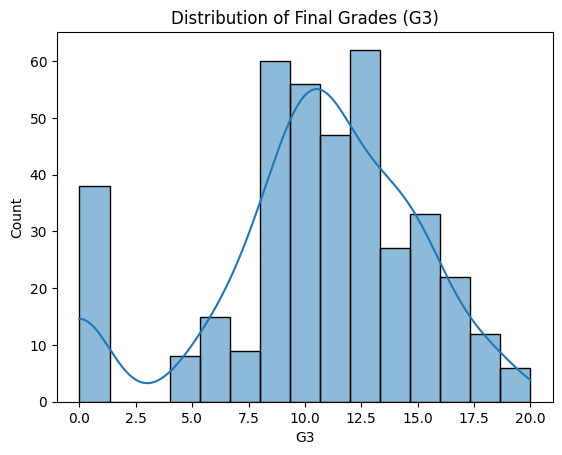

In [8]:
sns.histplot(student_data_encoded['G3'], kde=True, bins=15)
plt.title("Distribution of Final Grades (G3)")
plt.show()

In [9]:
student_data['avg_grade'] = student_data[['G1', 'G2']].mean(axis=1)

In [10]:
student_data_encoded = pd.get_dummies(student_data, drop_first=True)

print(student_data_encoded.head())

   age  Medu  Fedu  traveltime  studytime  failures  famrel  freetime  goout  \
0   18     4     4           2          2         0       4         3      4   
1   17     1     1           1          2         0       5         3      3   
2   15     1     1           1          2         3       4         3      2   
3   15     4     2           1          3         0       3         2      2   
4   16     3     3           1          2         0       4         3      2   

   Dalc  ...  guardian_mother  guardian_other  schoolsup_yes  famsup_yes  \
0     1  ...             True           False           True       False   
1     1  ...            False           False          False        True   
2     2  ...             True           False           True       False   
3     1  ...             True           False          False        True   
4     1  ...            False           False          False        True   

   paid_yes  activities_yes  nursery_yes  higher_yes  internet

In [11]:
from sklearn.preprocessing import MinMaxScaler

features = ['G1', 'G2', 'avg_grade', 'studytime', 'absences']
X = student_data_encoded[features]

scaler = MinMaxScaler()
X_normalized = pd.DataFrame(scaler.fit_transform(X), columns=features)

print("Normalized Features:\n", X_normalized.head())

Normalized Features:
        G1        G2  avg_grade  studytime  absences
0  0.1250  0.315789   0.205882   0.333333  0.080000
1  0.1250  0.263158   0.176471   0.333333  0.053333
2  0.2500  0.421053   0.323529   0.333333  0.133333
3  0.7500  0.736842   0.735294   0.666667  0.026667
4  0.1875  0.526316   0.352941   0.333333  0.053333


In [22]:
from sklearn.model_selection import train_test_split

y = student_data['G3']  

X_train, X_temp, y_train, y_temp = train_test_split(X_normalized, y, test_size=0.3, random_state=42, shuffle=True)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(f"Training set: {X_train.shape}, {y_train.shape}")


Training set: (276, 5), (276,)


In [13]:
print(f"Validation set: {X_val.shape}, {y_val.shape}")

Validation set: (59, 5), (59,)


In [14]:
print(f"Test set: {X_test.shape}, {y_test.shape}")

Test set: (60, 5), (60,)


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

model = DecisionTreeRegressor(random_state=42, max_depth=10)

model.fit(X_train, y_train)

y_val_pred = model.predict(X_val)
y_test_pred = model.predict(X_test)

rmse_val = mean_squared_error(y_val, y_val_pred, squared=False)  # Root Mean Squared Error
r2_val = r2_score(y_val, y_val_pred) # R-squared score

rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)
r2_test = r2_score(y_test, y_test_pred)

print(f"Validation RMSE: {rmse_val:.2f}, R2: {r2_val:.2f}")

Validation RMSE: 1.92, R2: 0.85


c:\Users\nkwet\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\nkwet\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [16]:
print(f"Test RMSE: {rmse_test:.2f}, R2: {r2_test:.2f}")

Test RMSE: 2.13, R2: 0.77


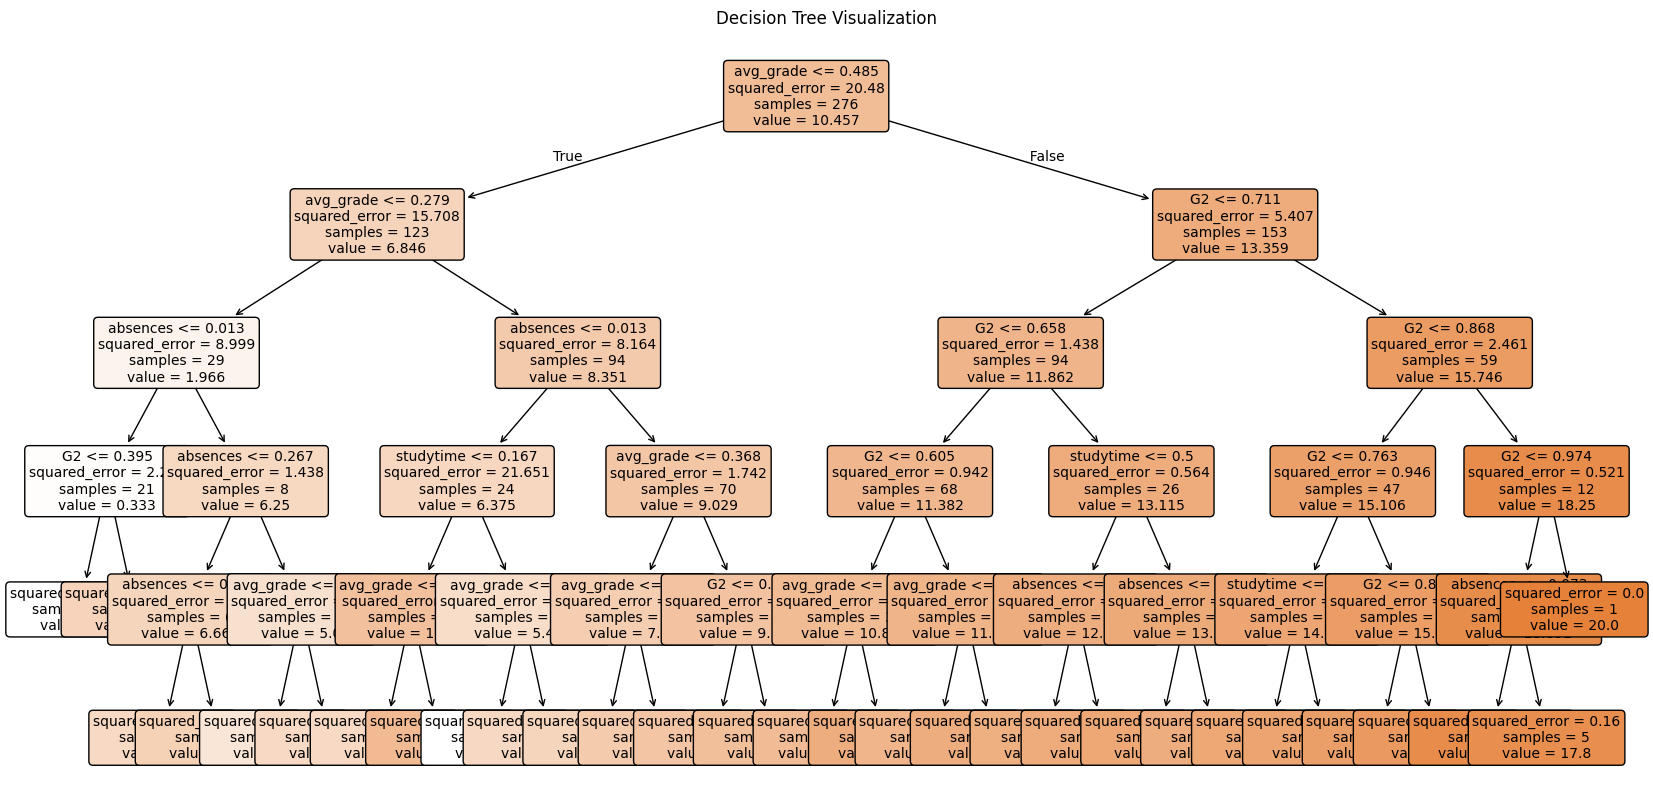

In [17]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(
    model, 
    feature_names=X_train.columns,
     filled=True,
       rounded=True,
        fontsize=10 
        )
plt.title("Decision Tree Visualization")
plt.show()

In [19]:
print(student_data['G3'].value_counts())


G3
10    56
11    47
0     38
15    33
8     32
12    31
13    31
9     28
14    27
16    16
6     15
18    12
7      9
5      7
17     6
19     5
20     1
4      1
Name: count, dtype: int64


In [18]:
import joblib

joblib.dump(model, 'decision_tree_model')

model = joblib.load('decision_tree_model')


